# Model Evaluation

Below, the training and test data will be evaluated against different models. The evaluation will be accompanied with different accuracy checks to determine performance.

In [1]:
import pandas as pd
from sklearn.metrics import  root_mean_squared_error

# I know it is hitchhiker's guide to the galaxy
r_state = 42

models_train = []
models_test = []

In [2]:
train_df = pd.read_csv('data/train_data.csv', index_col='Unnamed: 0')
test_df = pd.read_csv('data/test_data.csv', index_col='Unnamed: 0')

columns = train_df.columns

print (columns)


Index(['HOSP_COUNT_7DAY_AVG', 'DEATH_COUNT_7DAY_AVG', 'popularity_rating',
       'norm_hosp_count_7day_avg', 'norm_death_count_7day_avg',
       'norm_popularity_rating', 'y'],
      dtype='object')


In [3]:
X_train = train_df.drop(labels=['y', 'HOSP_COUNT_7DAY_AVG', 'DEATH_COUNT_7DAY_AVG', 'popularity_rating'], axis=1)
y_train = train_df['y'].apply( lambda x: 1.0 * x)

X_test = test_df.drop(labels=['y', 'HOSP_COUNT_7DAY_AVG', 'DEATH_COUNT_7DAY_AVG', 'popularity_rating'], axis=1)
y_test = test_df['y'].apply( lambda x: 1.0 * x)

In [4]:

y_train.info()

<class 'pandas.core.series.Series'>
Index: 204 entries, 0 to 203
Series name: y
Non-Null Count  Dtype  
--------------  -----  
204 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [5]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 52 entries, 204 to 255
Series name: y
Non-Null Count  Dtype  
--------------  -----  
52 non-null     float64
dtypes: float64(1)
memory usage: 832.0 bytes


In [6]:
X_train.head()

,norm_hosp_count_7day_avg,norm_death_count_7day_avg,norm_popularity_rating
0,0.000000,0.00000,0.000000
1,0.004785,0.00000,0.236559
2,0.069976,0.00129,0.387097
3,0.349880,0.04129,0.494624
4,0.845096,0.28000,0.655914


In [7]:
def plot_line(y1, y2):
    working_data = {
        'y_test' : y1,
        'y_pred': y2
    }

    working_df = pd.DataFrame(working_data)
    working_df.plot(kind="line")

In [8]:
def gen_model_entry(name, y1, y2):
    entry = {
        'model' : name,
        'rmse' : root_mean_squared_error(y1, y2)
    }    

    return entry

## Bsaeline

In [9]:
from sklearn.dummy import DummyRegressor

reg = DummyRegressor()
dum_model = reg.fit(X_train, y_train)

y_pred = dum_model.predict(X_test)

In [10]:
report = root_mean_squared_error(y_test, y_pred)
print(report)

1820.186046568848


In [11]:
models_test.append(gen_model_entry('Dummy Regressor', y_test, y_pred))

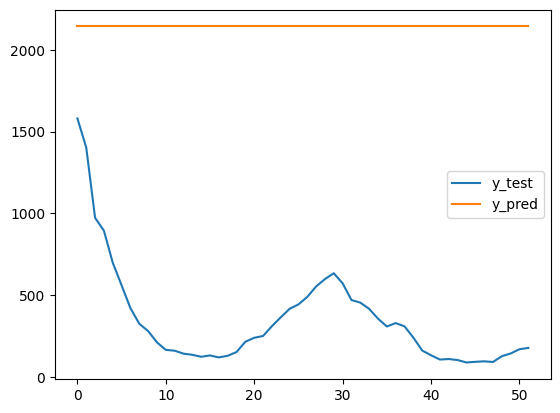

In [12]:
plot_line(y_test.to_list(), y_pred)

In [13]:
y_pred = dum_model.predict(X_train)
models_train.append(gen_model_entry('Dummy Regressor', y_train.to_list(), y_pred))

## Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(random_state=r_state, max_iter=1000)
log_model = reg.fit(X_train, y_train)

y_pred = log_model.predict(X_test)

/home/mmcdougall/covid19-web-data-predictor/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1201: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  check_classification_targets(y)


In [15]:
report = root_mean_squared_error(y_test, y_pred )
print (report)

4204.563351974761


In [16]:
models_test.append(gen_model_entry('Logistic Regressor', y_test, y_pred))

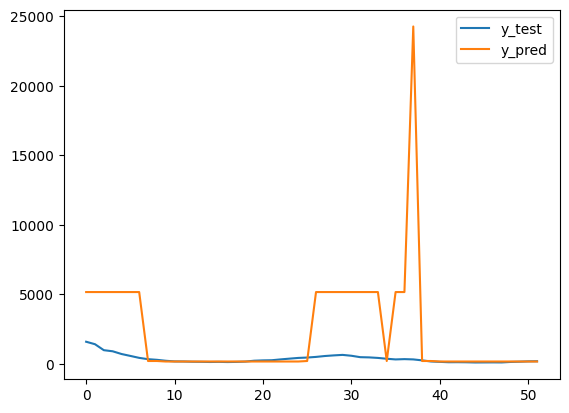

In [17]:
plot_line(y_test.to_list(), y_pred)

In [18]:
y_pred = log_model.predict(X_train)
models_train.append(gen_model_entry('Logistic Regressor', y_train.to_list(), y_pred))

## Linear Regressor

In [19]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
linear_model = reg.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)

In [20]:
report = root_mean_squared_error(y_test, y_pred)
print (report)

4992.383461484875


In [21]:
models_test.append(gen_model_entry('Linear Regressor', y_test, y_pred))

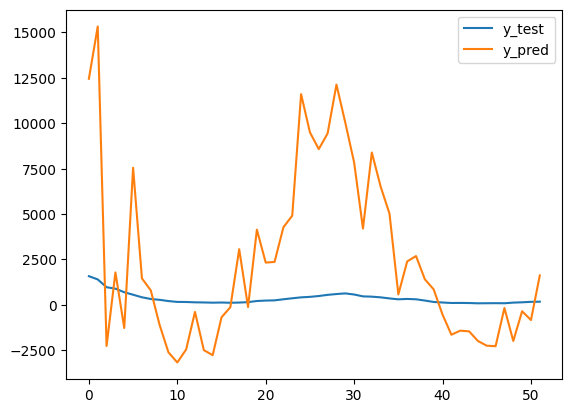

In [22]:
plot_line(y_test.to_list(), y_pred)

In [23]:
y_pred = linear_model.predict(X_train)
models_train.append(gen_model_entry('Linear Regressor', y_train.to_list(), y_pred))

## Tree Regressor

In [24]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor()
dtree_model = reg.fit(X_train, y_train)

y_pred = dtree_model.predict(X_test)

In [25]:
report = root_mean_squared_error(y_test, y_pred)
print(report)

6032.105867133608


In [26]:
models_test.append(gen_model_entry('Tree Regressor', y_test, y_pred))

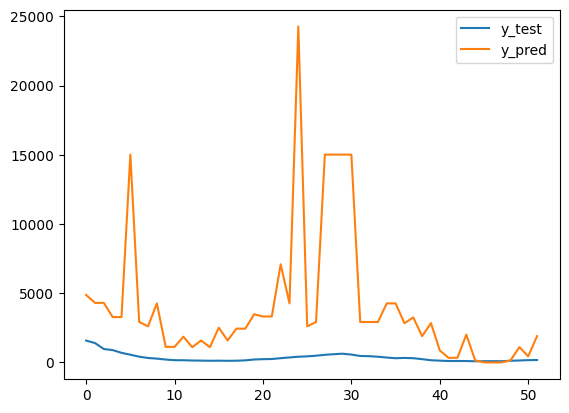

In [27]:
plot_line(y_test.to_list(), y_pred)

In [28]:
y_pred = dtree_model.predict(X_train)
models_train.append(gen_model_entry('Tree Regressor', y_train.to_list(), y_pred))

## Random Forest Regressor

In [29]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor()
rfg_model = reg.fit(X_train, y_train)

y_pred = rfg_model.predict(X_test)

In [30]:
report = root_mean_squared_error(y_test, y_pred)
print(report)

6375.50612685498


In [31]:
models_test.append(gen_model_entry('Random Forest Regressor', y_test, y_pred))

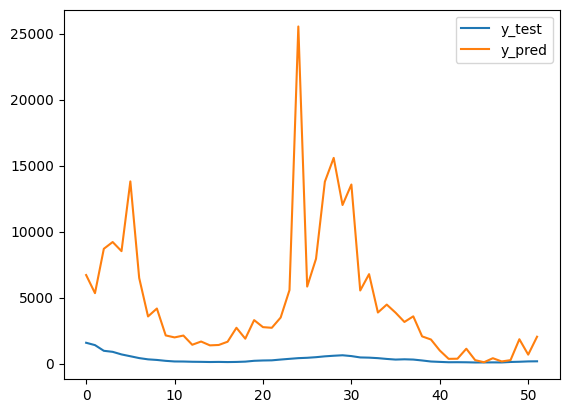

In [32]:
plot_line(y_test.to_list(), y_pred)

In [33]:
y_pred = rfg_model.predict(X_train)
models_train.append(gen_model_entry('Random Forest Regressor', y_train.to_list(), y_pred))

## Gradient Boost Regressor

In [34]:
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor()
gbr_model = reg.fit(X_train, y_train)

y_pred = gbr_model.predict(X_test)

In [35]:
report = root_mean_squared_error(y_test, y_pred)
print(report)

5760.03343217958


In [36]:
models_test.append(gen_model_entry('Gradient Boost Regressor', y_test, y_pred))

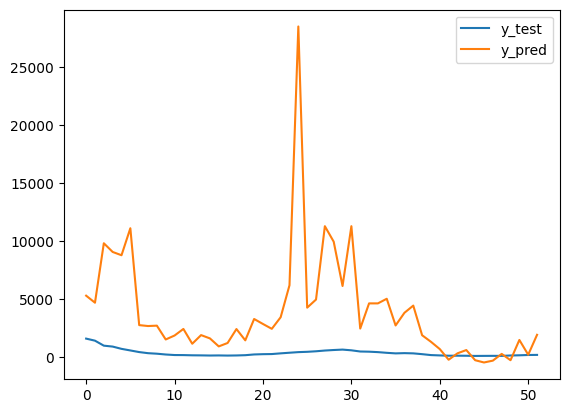

In [37]:
plot_line(y_test.to_list(), y_pred)

In [38]:
y_pred = gbr_model.predict(X_train)
models_train.append(gen_model_entry('Gradient Boost Regressor', y_train.to_list(), y_pred))

## XGBoost Regressor

In [39]:
import xgboost as xgb

reg = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=r_state)
xgb_model = reg.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

In [40]:
report = root_mean_squared_error(y_test, y_pred)
print(report)

4837.473836998477


In [41]:
models_test.append(gen_model_entry('XGBoost Regressor', y_test, y_pred))

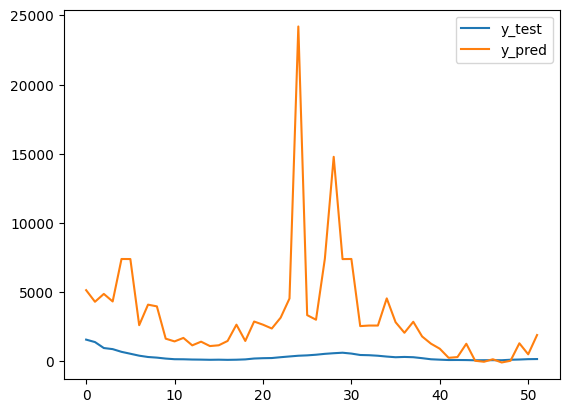

In [42]:
plot_line(y_test.to_list(), y_pred)

In [43]:
y_pred = xgb_model.predict(X_train)
models_train.append(gen_model_entry('XGBoost Regressor', y_train.to_list(), y_pred))

## Bayes Regressor

In [44]:
from sklearn.linear_model import BayesianRidge

reg = BayesianRidge()
br_model = reg.fit(X_train, y_train)

y_pred = br_model.predict(X_test)

In [45]:
report = root_mean_squared_error(y_test, y_pred)
print(report)

4954.052916985587


In [46]:
models_test.append(gen_model_entry('Bayes Regressor', y_test, y_pred))

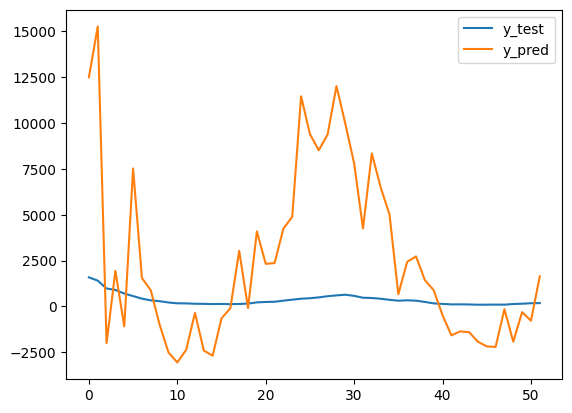

In [47]:
plot_line(y_test.to_list(), y_pred)

In [48]:
y_pred = br_model.predict(X_train)
models_train.append(gen_model_entry('Bayes Regressor', y_train.to_list(), y_pred))

## Linear Support Vector Regression

In [49]:
from sklearn.svm import LinearSVR

reg = LinearSVR()
svr_model = reg.fit(X_train, y_train)

y_pred = svr_model.predict(X_test)

In [50]:
report = root_mean_squared_error(y_test, y_pred)
print(report)

326.63437818020964


In [51]:
models_test.append(gen_model_entry('LinearSVR Regressor', y_test, y_pred))

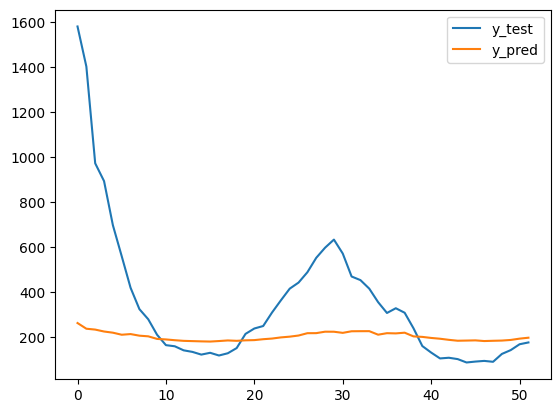

In [52]:
plot_line(y_test.to_list(), y_pred)

In [53]:
y_pred = svr_model.predict(X_train)
models_train.append(gen_model_entry('LinearSVR Regressor', y_train.to_list(), y_pred))

## SGD Regressor

In [54]:
from sklearn.linear_model import SGDRegressor

reg = SGDRegressor()
sgd_model = reg.fit(X_train, y_train)

y_pred = sgd_model.predict(X_test)

/home/mmcdougall/covid19-web-data-predictor/venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1612: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [55]:
report = root_mean_squared_error(y_test, y_pred)
print(report)

4371.895575441675


In [56]:
models_test.append(gen_model_entry('SGD Regressor', y_test, y_pred))

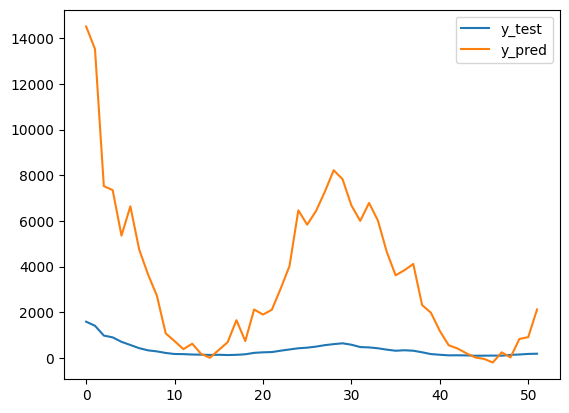

In [57]:
plot_line(y_test.to_list(), y_pred)

In [58]:
y_pred = sgd_model.predict(X_train)
models_train.append(gen_model_entry('SGD Regressor', y_train.to_list(), y_pred))

## Tabulate results

In [59]:
models_train_df = pd.DataFrame(models_train)
models_test_df = pd.DataFrame(models_test)

models_train_df['train_rmse'] = models_train_df['rmse']
models_test_df['test_rmse'] = models_test_df['rmse']

In [60]:
eval_df = pd.merge(models_train_df.drop(labels=['rmse'], axis=1), models_test_df.drop(labels=['rmse'], axis=1), on="model")

In [61]:
eval_df['diff'] = eval_df['train_rmse'] - eval_df['test_rmse']

In [62]:
eval_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   model       10 non-null     object 
 1   train_rmse  10 non-null     float64
 2   test_rmse   10 non-null     float64
 3   diff        10 non-null     float64
dtypes: float64(3), object(1)
memory usage: 452.0+ bytes


In [63]:
eval_df.sort_values(by=['test_rmse'], axis=0, ascending=True)

,model,train_rmse,test_rmse,diff
8,LinearSVR Regressor,4821.829278,326.634378,4495.194900
0,Dummy Regressor,4419.470059,1820.186047,2599.284013
1,Logistic Regressor,8053.265131,4204.563352,3848.701779
9,SGD Regressor,3384.131334,4371.895575,-987.764242
6,XGBoost Regressor,4.200686,4837.473837,-4833.273151
7,Bayes Regressor,2902.988123,4954.052917,-2051.064794
2,Linear Regressor,2902.600498,4992.383461,-2089.782964
5,Gradient Boost Regressor,194.021298,5760.033432,-5566.012134
3,Tree Regressor,0.000000,6032.105867,-6032.105867
4,Random Forest Regressor,1097.232279,6375.506127,-5278.273848


It appears that when comparing all models, the LinearSVR regressor was the best at predicting the number of cases on new data as the test data had the lowest root mean square error.  Further, it was less than the Dummy regressor whch was used to establish the baseline. All other models scored a higher test rmse value. 

I also wanted to point out that the diff between the train and test root mean square error was positive for the svm regressor, dummy regressor and logistic regressor. This indicates there was no overfitting by these three models. All other models demonstrated higher training root mean square errors on the training data than the test data, indicating significant overfitting.

However, there is more that can be done to improve its performance. 

I will use a SHAP analaysis to identify the best predictors and I will also improve the model performance by tuning its hyperparameters through grid search.

# I want to try a neural network to see if it can yield better results.